In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = pd.read_excel('MasterData_Wilson.xlsx')

In [3]:
file.head()

,date,time,year,MonthN,Month,WeekN,Day,WeekD,H,Min,...,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Unnamed: 29,Unnamed: 30
0,2016-07-25,2016-07-25 09:04:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,4.0,...,2.25,1,0,2.25,0,2.25,0.05,2.3,NaN,NaN
1,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,2,2,0,4,0,4,0.09,4.09,NaN,NaN
2,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,3.75,1,0,3.75,0,3.75,0.38,4.13,NaN,NaN
3,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,3.8,1,0,3.8,0,3.8,0.09,3.89,NaN,NaN
4,2016-07-25,2016-07-25 09:29:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,29.0,...,3.5,1,0,3.5,0,3.5,0.08,3.58,NaN,NaN


In [4]:
file['Total Due'] = pd.to_numeric(file['Total Due'], errors='coerce')
del file['Unnamed: 29']
del file['Unnamed: 30']
file.columns

Index(['date', 'time', 'year', 'MonthN', 'Month', 'WeekN', 'Day', 'WeekD', 'H',
       'Min', '30min', 'Rtime', '30time', 'H.5', 'Operation', 'Line Item',
       'Department', 'Category', 'Supplier', 'Supplier Code', 'Cost', 'Price',
       'Quantity', 'Modifiers', 'Subtotal', 'Discounts', 'Net Total', 'Tax',
       'Total Due'],
      dtype='object')

In [5]:
events = pd.read_csv('lychee_events.csv')
del events['Unnamed: 0']

In [13]:
events['event_date_f'] = pd.to_datetime(events['event_date'], errors='coerce')

In [116]:
merged_file = pd.merge(file, events, left_on='date', right_on='event_date_f',how='outer')
merged_file.head()

,date,time,year,MonthN,Month,WeekN,Day,WeekD,H,Min,...,Net Total,Tax,Total Due,event_date,event_link,event_time,event_title,start_time,end_time,event_date_f
0,2016-07-25,2016-07-25 09:04:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,4.0,...,2.25,0.05,2.30,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,4,0.09,4.09,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,3.75,0.38,4.13,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,3.8,0.09,3.89,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,2016-07-25,2016-07-25 09:29:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,29.0,...,3.5,0.08,3.58,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [117]:
merged_file.columns

Index(['date', 'time', 'year', 'MonthN', 'Month', 'WeekN', 'Day', 'WeekD', 'H',
       'Min', '30min', 'Rtime', '30time', 'H.5', 'Operation', 'Line Item',
       'Department', 'Category', 'Supplier', 'Supplier Code', 'Cost', 'Price',
       'Quantity', 'Modifiers', 'Subtotal', 'Discounts', 'Net Total', 'Tax',
       'Total Due', 'event_date', 'event_link', 'event_time', 'event_title',
       'start_time', 'end_time', 'event_date_f'],
      dtype='object')

In [118]:
del merged_file['time']
del merged_file['year']
del merged_file['MonthN']
del merged_file['Month']
del merged_file['WeekN']
del merged_file['Day']
del merged_file['WeekD']
del merged_file['H']
del merged_file['Min']
del merged_file['30min']
del merged_file['H.5']
del merged_file['Supplier']
del merged_file['Supplier Code']
del merged_file['event_date']
del merged_file['event_link']
del merged_file['event_time']
del merged_file['start_time']
del merged_file['end_time']
del merged_file['Operation']
del merged_file['30time']
del merged_file['Rtime']
del merged_file['event_date_f']

In [119]:
merged_file.head()

,date,Line Item,Department,Category,Cost,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,event_title
0,2016-07-25,Macaron Chocolate,Pastry,general,1,2.25,1,0,2.25,0,2.25,0.05,2.30,NaN
1,2016-07-25,Type in,general,general,0,2,2,0,4,0,4,0.09,4.09,NaN
2,2016-07-25,Latte,Coffee,general,0,3.75,1,0,3.75,0,3.75,0.38,4.13,NaN
3,2016-07-25,Chocolate croissant,Croissants,To Go,0,3.8,1,0,3.8,0,3.8,0.09,3.89,NaN
4,2016-07-25,Baguette tradition,Bread,general,1.4,3.5,1,0,3.5,0,3.5,0.08,3.58,NaN


In [120]:
date_group = merged_file.groupby(['date'])['Total Due'].sum().to_frame(name = 'count').reset_index()
merged_file1 = merged_file.merge(date_group)
merged_file1.head()

,date,Line Item,Department,Category,Cost,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,event_title,count
0,2016-07-25,Macaron Chocolate,Pastry,general,1,2.25,1,0,2.25,0,2.25,0.05,2.30,NaN,831.5
1,2016-07-25,Type in,general,general,0,2,2,0,4,0,4,0.09,4.09,NaN,831.5
2,2016-07-25,Latte,Coffee,general,0,3.75,1,0,3.75,0,3.75,0.38,4.13,NaN,831.5
3,2016-07-25,Chocolate croissant,Croissants,To Go,0,3.8,1,0,3.8,0,3.8,0.09,3.89,NaN,831.5
4,2016-07-25,Baguette tradition,Bread,general,1.4,3.5,1,0,3.5,0,3.5,0.08,3.58,NaN,831.5


In [130]:
merged_file1['event_title'].value_counts(dropna=False)
merged_file1['event_title'].fillna('No events', inplace=True)

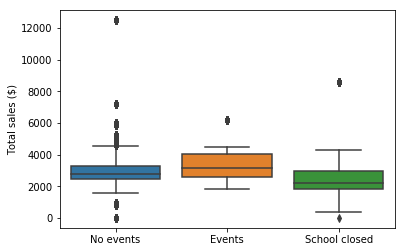

In [150]:
merged_file1["events_cat"] = merged_file1["event_title"].replace({"Spring Recess":"Closed", "Holiday Recess - School Closed":"Closed",\
                                                               "Fall Recess - School Closed":"Closed","Fall Recess - School Closed":"Closed",\
                                                               "Winter Recess - School Closed":"Closed","Thanksgiving Break - School Closed":"Closed",\
                                                               "Martin Luther King Day - School Closed":"Closed","Memorial Day - School Closed":"Closed",\
                                                               "MLK Day - School Closed":"Closed","Labor Day - School Closed":"Closed",\
                                                               "Start'Up Lycée":"Event","French Fall Market":"Event",\
                                                               "Lycée French Market":"Event","In Service Day for Staff - School Closed":"Event",\
                                                               "Parent - Teacher Conferences - No School for Students":"Event","Open House":"Event",\
                                                               "Back to School Prep for All Staff":"Event","Auditions for LFC Production of Les Misérables":"Event",\
                                                               "Back to School Prep for New Teachers":"Event","Les Misérables - Saturday Performance: A Lycée Français de Chicago Extracurricular production":"Event",\
                                                               "Science Fair and Maker Faire":"Event","Les Misérables - Sunday Performance: A Lycée Français de Chicago Extracurricular production":"Event",\
                                                               "Grandparents and Special Friends Day":"Event","End of School Year - Half Day":"Event",\
                                                               "Start'Up Lycée":"Event","French Fall Market":"Event",\
                                                               "School Opens for ALL":"Event",'La Nuit de la Lecture':"Event",\
                                                               "End of School Year" : "Event",\
                                                               'Second Annual "Oui" Run 5K':"Event",\
                                                               "1st Day of School":"Event","Annual Golf Outing":"Event",\
                                                               "School Opens for Preschool":"Event","Welcome Day":"Event",\
                                                               "School Opens for 1st - 12th grade":"Event",'Lecture et conversation : la fiscalité et gestion de patrimoine pour les francais résidents aux Etats-Unis':"Event",\
                                                               "International College Fair":"Event",'Parent Association Welcome Coffee':"Event",\
                                                               "4th Annual LFC Golf Outing":"Event","In Service Day for Staff - No School for Students":"Event",\
                                                                "No events":"No events"})

#figures
p = sns.boxplot(x='events_cat',y='count',data=merged_file1)
plt.xlabel("")
plt.xticks(np.arange(3),(["No events","Events","School closed"]))
plt.ylabel("Total sales ($)")
plt.savefig('eventsanalyses.tif', dpi=600)
#merged_file1.to_csv('events_finance.csv')
